In [8]:
from my_logging import my_outputs_and_logging
log = my_outputs_and_logging('BLACK_BOX_CODE')
print log.get_output_path()


> First data Reading from Bulk data and clean it(with lib)

In [9]:
from file_commander import my_file_commander

commander = my_file_commander()
### TO READ
article_path ='/Users/uluc/Desktop/Bitirme/Wikiparse_WorkSpace/<2018.10.-->Wiki/<2018-10-20>Outputs_Bulk/All_Article.txt'
splitter_patter = '\n\n\n'
dataContains_tuples = ['id','title','infoBox_type','text_infoBox','bulk_paragraph']
articles = commander.my_tub_file_reader(article_path,splitter_patter,dataContains_tuples)

##3 this part otomaticley parse infobox

###Save this clean Data
### TO SAVE
dataContains_tuples = ['id','title','infoBox_type','bulk_infoBox','clean_infoBox','bulk_paragraph']
commander.my_tub_file_recorder(log.get_output_path()+'All_Articles.txt',articles,'\n\n\n',dataContains_tuples)

log.save_log('Read Bulk Data',u'#Articles read -> '+str(commander.read_total)+'\n#Articles read successfully -> '+str(commander.read_successfully)+'\n#Articles saved successfully -> '+str(commander.saved_successfully))




> Data analysis

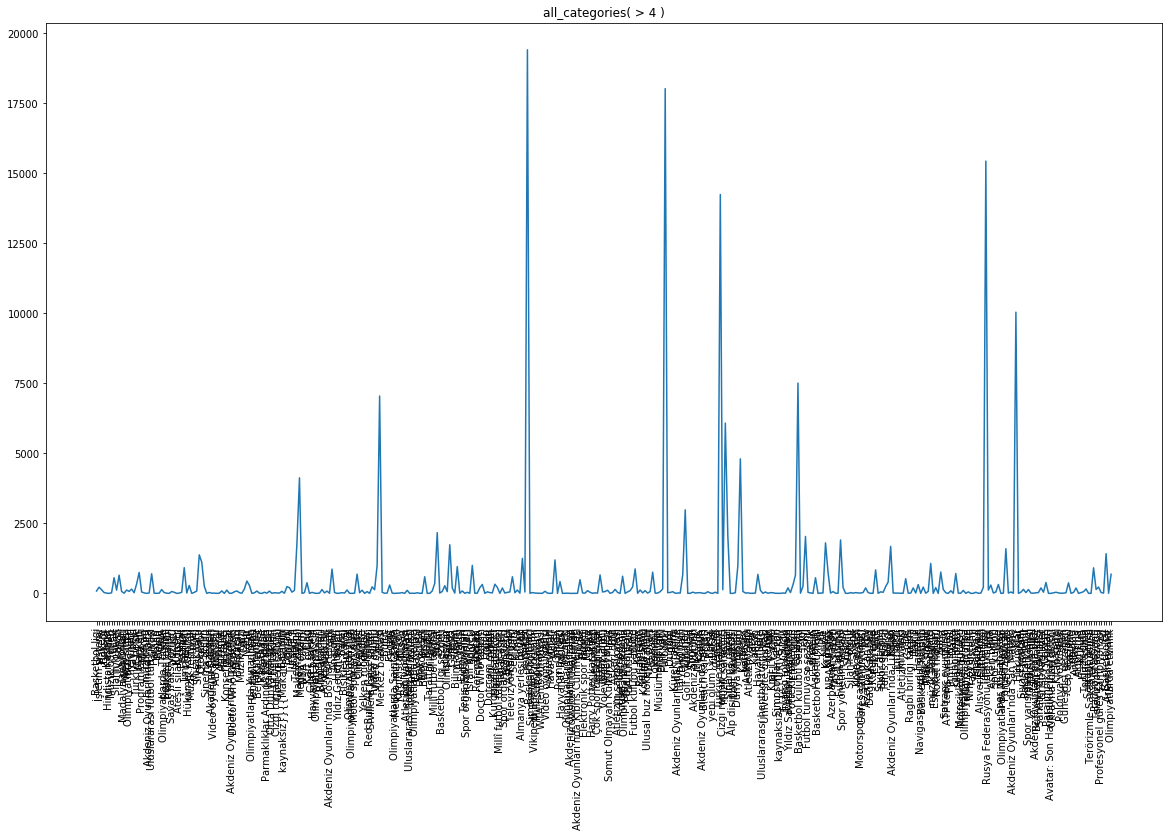

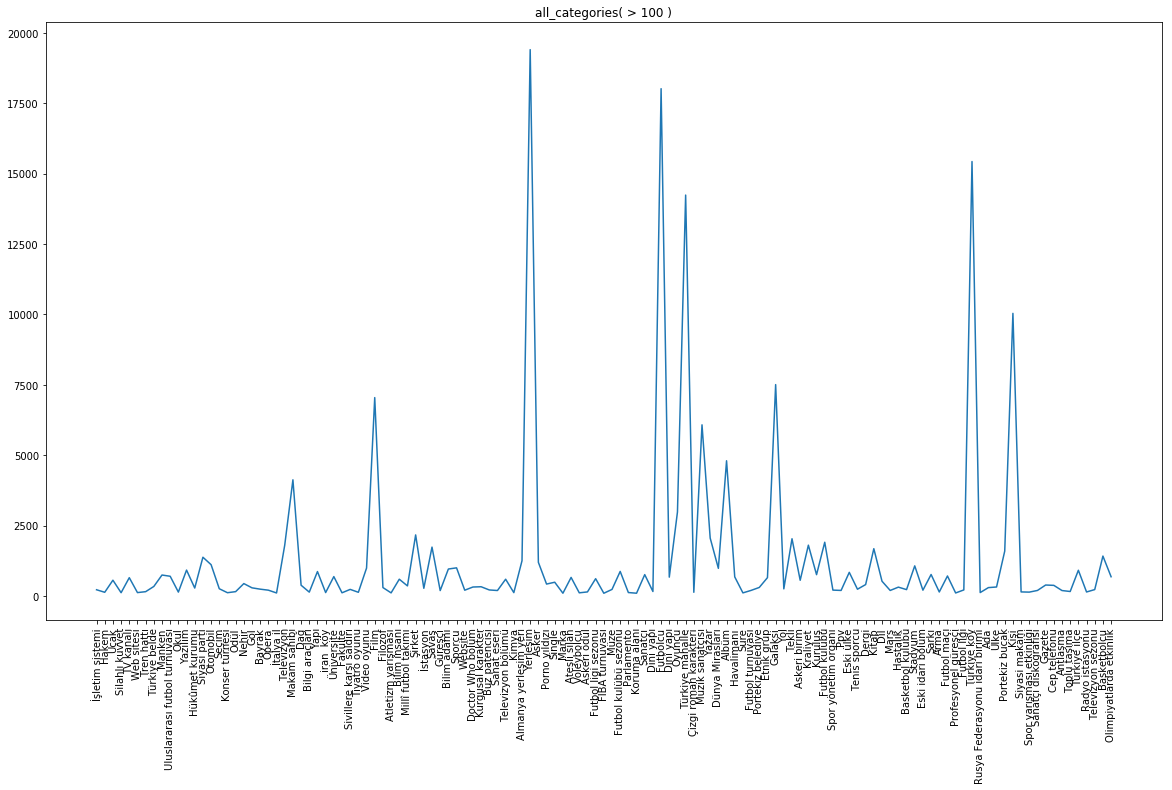

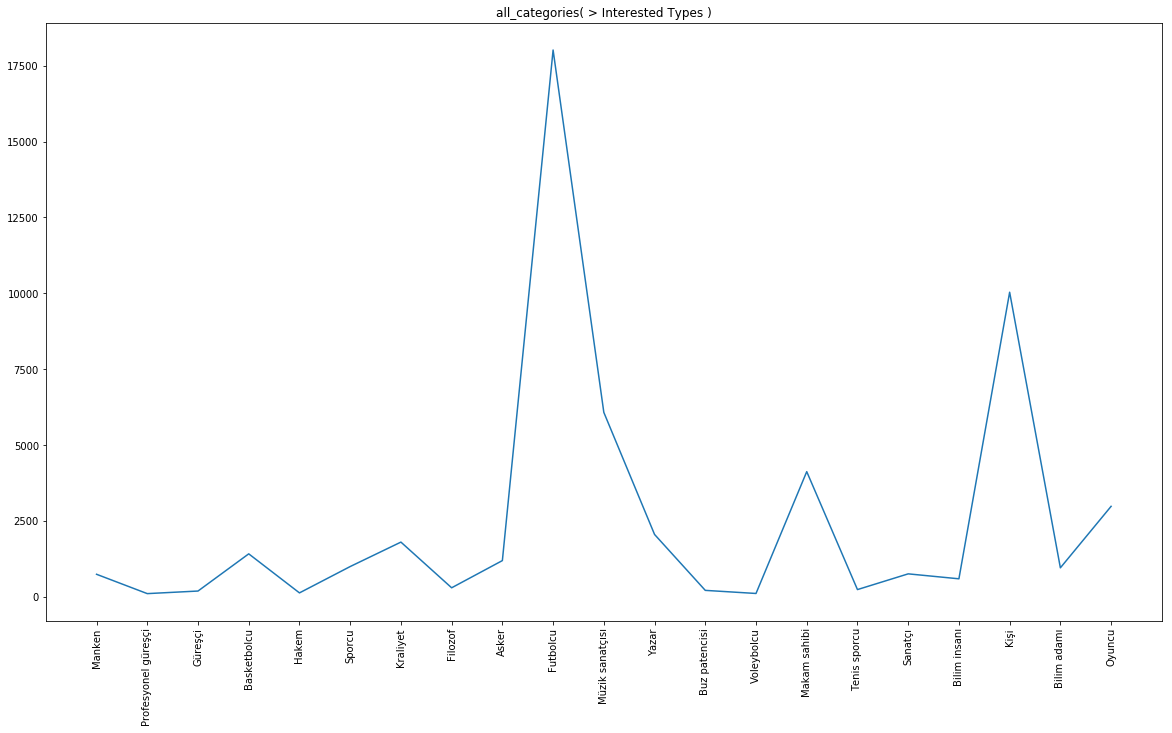

In [10]:
import json
from sapsik_bir_Analyser import Article_Analyser
log.add_splitter()
Analysis_Article = Article_Analyser(articles)

mypath = log.get_output_path() +'InfoBoxType_Analysis/'

# > 4
all_categories_greater_4 = Analysis_Article.get_all_uniq_infoBoxTypes_as_list(4)
log.logging('#Total Uniq InfoBox Type ( > 4 ) : '+ str(len(all_categories_greater_4)))
for one in all_categories_greater_4 : 
    log.create_a_file_in_a_folder('InfoBoxType_Analysis','all_categories( > 4 )',one.encode('utf-8'))
Analysis_Article.draw_Repetition_of_all_InfoBoxTypes(mypath,'all_categories( > 4 )',4)

# > 100
all_categories_greater_100 = Analysis_Article.get_all_uniq_infoBoxTypes_as_list(100)
Analysis_Article.draw_Repetition_of_all_InfoBoxTypes(mypath,'all_categories( > 100 )',100)
log.logging('#Total Uniq InfoBox Type ( > 100 ) : '+ str(len(all_categories_greater_100)))
for one in all_categories_greater_100 : 
    log.create_a_file_in_a_folder('InfoBoxType_Analysis','all_categories( > 100 )',one.encode('utf-8'))

    
# Our interested Info Box Types
Interested_Info_Box_Types = ['Hakem' ,'Manken' ,'Makam sahibi' ,'Filozof' ,'Bilim insanı','Güreşçi' 
                             ,'Bilim adamı' ,'Sporcu' ,'Buz patencisi','Asker' 
                             ,'Voleybolcu' ,'Sanatçı','Futbolcu' ,'Oyuncu' 
                             ,'Müzik sanatçısı' ,'Yazar' ,'Kraliyet' ,'Tenis sporcu' ,'Profesyonel güreşçi'
                             ,'Kişi' ,'Basketbolcu'] #'Çizgi roman karakteri' , 'Kurgusal karakter'
log.save_log('Interested Info Box Types',json.dumps(Interested_Info_Box_Types, ensure_ascii=False, encoding='utf8').encode('utf-8'))

Analysis_Article.ignore_other_types(Interested_Info_Box_Types)

all_categories_interested = Analysis_Article.get_all_uniq_infoBoxTypes_as_list(100)

Analysis_Article.draw_Repetition_of_all_InfoBoxTypes(mypath,'all_categories( > Interested Types )',1)
log.logging('#Total Uniq InfoBox Type ( > Interested ) : '+ str(len(all_categories_interested)))
log.logging('#Total Article ( > Interested ) : '+ str(len(Analysis_Article.articles)))
for one in  all_categories_interested : 
    log.create_a_file_in_a_folder('InfoBoxType_Analysis','all_categories( > interested )',one.encode('utf-8'))
    
    
###Save for all interested clean data
### TO SAVE
dataContains_tuples = ['id','title','infoBox_type','bulk_infoBox','clean_infoBox','bulk_paragraph']
commander.my_tub_file_recorder(log.get_output_path()+'All_Articles_Interested.txt',Analysis_Article.articles,'\n\n\n',dataContains_tuples)
log.logging('#Total Articles saved successfully ( > Interested ) : '+ str(commander.saved_successfully))

>Data Field Count

In [11]:
mypath = log.get_output_path() +'InfoBoxType_DataField_Counts'
if not os.path.isdir(mypath):
    os.makedirs(mypath)
mypath = mypath+'/'    
Analysis_Article.count_data_fields()
Analysis_Article.save_allCounts_2_file(mypath)
Analysis_Article.save_Counts_for_types(mypath)
Analysis_Article.save_uniq_fields(mypath)
Analysis_Article.save_dataField_Analysis(mypath)     
log.logging('All Data Field Countings finished')


---
> To generate clean Paragraph

In [12]:
'''
from my_logging import my_outputs_and_logging
log = my_outputs_and_logging('BLACK BOX CODE')
print log.get_output_path()
log.add_splitter()
'''
from file_commander import my_file_commander
from sapsik_bir_Analyser import Article_Analyser
commander = my_file_commander()

### TO READ
article_path = log.get_output_path()+'All_Articles_Interested.txt'
splitter_patter = '\n\n\n'
dataContains_tuples = ['id','title','infoBox_type','bulk_infoBox','clean_infoBox','bulk_paragraph']
articles = commander.my_tub_file_reader(article_path,splitter_patter,dataContains_tuples)
Analysis_Article = Article_Analyser(articles)


from dataCleaner import process_bulk_paragraph

count = 0 
for i,a in enumerate(Analysis_Article.articles):
    bulk_paragraph = a.article['bulk_paragraph']
    clean_paragraph = process_bulk_paragraph(bulk_paragraph)
    if 'None' not in clean_paragraph:
        count +=1
    Analysis_Article.articles[i].article['clean_paragraph'] = clean_paragraph



### Save for all interested clean data with clean_paragraph
### TO SAVE
dataContains_tuples = ['id','title','infoBox_type','bulk_infoBox','clean_infoBox','bulk_paragraph','clean_paragraph']
commander.my_tub_file_recorder(log.get_output_path()+'All_Articles_Interested_with_clean_paragraph.txt',Analysis_Article.articles,'\n\n\n',dataContains_tuples)
log.logging('#Total Articles saved successfully ( > Interested + clean_paragraph ) : '+ str(commander.saved_successfully))
log.logging('#Total Articles saved with clean paragraph successfully ( > Interested + clean_paragraph ) : '+ str(count))



---
> To generate sentences

In [17]:
#from dataCleaner import generate_and_save_articles_with_santences

#generate_and_save_articles_with_santences( inputfile = log.get_output_path()+'All_Articles_Interested_with_clean_paragraph.txt',
#                                           output_file = log.get_output_path()+'All_Articles_Interested_with_clean_paragraph_and_sentences.txt')
'''
#run this part from terminal
export CLASSPATH=zemberek-full.jar:$CLASSPATH
javac -cp zemberek-full.jar SentenceSplitter.java


python 

from dataCleaner import generate_and_save_articles_with_santences
generate_and_save_articles_with_santences(  '../\<2018-12-08\>Outputs-BLACK_BOX_CODE/All_Articles_Interested_with_clean_paragraph.txt','../<2018-12-08>Outputs-BLACK_BOX_CODE/All_Articles_Interested_with_clean_paragraph_and_sentences.txt')
'''

from file_commander import my_file_commander
from sapsik_bir_Analyser import Article_Analyser
commander = my_file_commander()


### TO READ
article_path = log.get_output_path()+'All_Articles_Interested_with_clean_paragraph_and_sentences.txt'
splitter_patter = '\n\n\n'
dataContains_tuples = ['id','title','infoBox_type','bulk_infoBox','clean_infoBox','bulk_paragraph','clean_paragraph','Sentences']
articles = commander.my_tub_file_reader(article_path,splitter_patter,dataContains_tuples)
Analysis_Article = Article_Analyser(articles)


first_s = 0
second_s = 0
for a in Analysis_Article.articles:
    sentences = a.article['Sentences'].split('@')
    if 'None' not in sentences[0]:
        first_s +=1
    if 'None' not in sentences[1]:
        second_s +=1

        
log.add_splitter()

log.logging('#Total Articles saved successfully ( > Interested + clean_paragraph + sentences ) :' + str(len(Analysis_Article.articles)))
log.logging('#Total Articles saved with first_sentences successfully ( > Interested + first_sentence ) : '+ str(first_s))
log.logging('#Total Articles saved with first and second sentences successfully ( > Interested + first_and_second_sentences ) : '+ str(second_s))

## to save in list of json format 
import json
json_ = []
for a in Analysis_Article.articles:
    json_.append(a.article)
all_info_as_str = json.dumps ( json_ , ensure_ascii=False, encoding='utf8',indent=4).encode('utf-8')
file = open(log.get_output_path()+"All_Articles_Interested_with_clean_paragraph_and_sentences_as_json.txt","w") 
file.write( all_info_as_str )
file.close() 



    


---
> Save examples for each type

In [18]:
## for each info box type one example is saved
import json
examples = Analysis_Article.get_one_example_for_every_infoBox_type()
for type_,one_example, in examples :
    log.create_a_file_in_a_folder('InfoBoxType_Examples',type_,json.dumps(one_example, ensure_ascii=False, encoding='utf8',indent=4).encode('utf-8'))
log.logging('For each info box type one example is saved')

---
To get DA's

In [19]:
from file_commander import my_file_commander
from sapsik_bir_Analyser import Article_Analyser
commander = my_file_commander()

### TO READ
article_path = log.get_output_path()+'All_Articles_Interested_with_clean_paragraph_and_sentences.txt'
splitter_patter = '\n\n\n'
dataContains_tuples = ['id','title','infoBox_type','bulk_infoBox','clean_infoBox','bulk_paragraph','clean_paragraph','Sentences']
articles = commander.my_tub_file_reader(article_path,splitter_patter,dataContains_tuples)
Analysis_Article = Article_Analyser(articles)

import DA_Combiner as Combiner
rules = Combiner.get_rules('./RULES.txt')
Analysis_Article.articles ,possible_DAs = Combiner.create_DA_combinations(rules,Analysis_Article.articles)
save_path = log.get_output_path() + 'Dialog_Acts'
tried,counter,DA_id = Combiner.save_DAs(save_path,possible_DAs)


log.add_splitter()
log.save_log('DA Convertion',str( '#Tried to convert to DA from infoBox -> '+str(tried) 
             + '\n#Converted to DA from infoBox -> '+ str(counter) 
             + '\n#DA saved succesfully -> '+ str(DA_id) ))

###Save for all interested clean data
### TO SAVE
dataContains_tuples = ['id','title','infoBox_type','bulk_infoBox','clean_infoBox','bulk_paragraph','clean_paragraph','Sentences','DA_as_str','DA_fields']

commander.my_tub_file_recorder(log.get_output_path()+'All_Articles_with_allDAs.txt',Analysis_Article.articles,'\n\n\n',dataContains_tuples)
log.logging('#Total Articles saved successfully ( > with all DA ) : '+ str(commander.saved_successfully))




---
>Matcher

In [28]:
def match_sentance(DA_field, sentence ):
    '''
    print '\n\ndenenen\n','-'*40
    print json.dumps(DA_field, ensure_ascii=False, encoding='utf8',indent = 4)            
    print sentence      
    '''
    flag = False
    if sentence=='None':
        return flag
    sentence = sentence.lower()
    
    flag = True
    for value in DA_field.values():
        values = value.split(' ')
        temp_flag = False
        for part_value in values:
            if len(part_value)<=4:
                if (part_value.encode('utf-8').lower() in sentence):
                    temp_flag = True
                    break      
                else:
                    return False
            else:
                if (part_value[:-1].encode('utf-8').lower() in sentence):
                    temp_flag = True
                    break
                else:
                    return False
    return True

matcher = []
for a in Analysis_Article.articles:
    a = a.article
    sentence = a['Sentences'].split('@')[0]
    
    DA_fields = a['DA_fields']
    tempList = []
    index = -1
    for i,DA_field in enumerate(DA_fields): 
        try:
            if match_sentance(DA_field, sentence ):
                match = ( a['DA_as_str'].split('\n')[len(DA_fields)-1-i] , sentence )
                matcher.append(match)
                break
        except Exception as e:
            pass

f = open(log.get_output_path()+'Matched_DA2_and_sentences.txt','w')
for i in matcher:
    a =  str(i[0])+'\n'+str(i[1]) +'\n\n\n'
    f.write(a)

log.add_splitter()  
log.logging('#Total Matched DAs number: '+ str(len(matcher)))


    
    

---
Diffrent Codes

In [26]:
## tum infobox tiplerine gore tum cumleler listelendi

infoBox_sentences = {}
for a in Analysis_Article.articles:
    a=a.article
    try:
        infoBox_sentences[a['infoBox_type']].append(a['Sentences'].split('@')[0])
    except Exception as e:
        infoBox_sentences[a['infoBox_type']] = []        
        infoBox_sentences[a['infoBox_type']].append(a['Sentences'].split('@')[0])
        
mypath = log.get_output_path() +'ALL_InfoBox_Sentences'
if not os.path.isdir(mypath):
    os.makedirs(mypath)
mypath = mypath+'/'   

for key in infoBox_sentences.keys():
    f = open(mypath+key+'_Sentences.txt','w')
    for values in infoBox_sentences[key]:
        a =  '->'+str(values) + '\n\n'
        f.write(a)
        
## tum infobox tiplerine gore tum cumleler DS ile birlikte listelendi

infoBox_sentences = {}
for a in Analysis_Article.articles:
    a=a.article
    try:
        b = a['DA_as_str'],a['Sentences'].split('@')[0]
        infoBox_sentences[a['infoBox_type']].append(b)
    except Exception as e:
        infoBox_sentences[a['infoBox_type']] = []        
        b = a['DA_as_str'],a['Sentences'].split('@')[0]
        infoBox_sentences[a['infoBox_type']].append(b)
        
mypath = log.get_output_path() +'ALL_InfoBox_Sentences_with_DAs'
if not os.path.isdir(mypath):
    os.makedirs(mypath)
mypath = mypath+'/'   

for key in infoBox_sentences.keys():
    f = open(mypath+key+'_Sentences_with_DAs.txt','w')
    for DA,sentence in infoBox_sentences[key]:
        a =  str(DA)+'->'+str(sentence) + '\n\n'
        f.write(a)

        

